In [1]:
import argparse
import sys
import yt
import numpy as np

/usr/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [25]:
idx_start = 0
idx_end = 0
didx = 1

colormap = 'viridis_r'
field = 'density'
center_mode = 'c'
dpi = 1000

code_units = { "length_unit":(1,"kpc"),
               "time_unit"  :(1,"s"),
               "mass_unit"  :(1.4690033e+36,"g"),
               "velocity_unit": (34300, "cm/s")}

In [26]:
ts = yt.load(['Data_%06d'%idx for idx in range(idx_start,idx_end+1,didx)],
            units_override=code_units)

In [29]:
ds = yt.load("Data_000000")

yt : [INFO     ] 2018-06-28 09:33:46,754 Parameters: current_time              = 1e-05
yt : [INFO     ] 2018-06-28 09:33:46,755 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2018-06-28 09:33:46,756 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2018-06-28 09:33:46,757 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2018-06-28 09:33:46,758 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2018-06-28 09:33:46,758 Parameters: current_redshift          = 99998.99999999999
yt : [INFO     ] 2018-06-28 09:33:46,759 Parameters: omega_lambda              = 0.0
yt : [INFO     ] 2018-06-28 09:33:46,760 Parameters: omega_matter              = 1.0
yt : [INFO     ] 2018-06-28 09:33:46,761 Parameters: hubble_constant           = 0.7


In [32]:
ds.all_data()

YTRegion (Data_000000): , center=[2.20405542e+24 2.20405542e+24 2.20405542e+24] cm, left_edge=[0. 0. 0.] cm, right_edge=[4.40811083e+24 4.40811083e+24 4.40811083e+24] cm

In [30]:
reg = ds.unit_registry

for un in reg.keys():
    if un.startswith('code_'):
        fmt_tup = (un, reg.lut[un][0], str(reg.lut[un][1]))
        print ("Unit name:      {:<15}\nCGS conversion: {:<15}\nDimensions:     {:<15}\n".format(*fmt_tup))

Unit name:      code_length    
CGS conversion: 4.4081108307e+24
Dimensions:     (length)       

Unit name:      code_mass      
CGS conversion: 7.884255915701993e+44
Dimensions:     (mass)         

Unit name:      code_density   
CGS conversion: 9.204563475703492e-30
Dimensions:     (mass)/(length)**3

Unit name:      code_specific_energy
CGS conversion: 100000000000000.0
Dimensions:     (length)**2/(time)**2

Unit name:      code_time      
CGS conversion: 4.4081108306999994e+17
Dimensions:     (time)         

Unit name:      code_magnetic  
CGS conversion: 1.0            
Dimensions:     sqrt((mass))/(sqrt((length))*(time))

Unit name:      code_temperature
CGS conversion: 1.0            
Dimensions:     (temperature)  

Unit name:      code_pressure  
CGS conversion: 9.204563475703495e-16
Dimensions:     (mass)/((length)*(time)**2)

Unit name:      code_velocity  
CGS conversion: 10000000.0     
Dimensions:     (length)/(time)

Unit name:      code_metallicity
CGS conversion: 1.

yt : [INFO     ] 2018-06-27 10:44:44,508 Projection completed
yt : [INFO     ] 2018-06-27 10:44:44,509 xlim = 0.000000 1.000000
yt : [INFO     ] 2018-06-27 10:44:44,509 ylim = 0.000000 1.000000
yt : [INFO     ] 2018-06-27 10:44:44,510 xlim = 0.000000 1.000000
yt : [INFO     ] 2018-06-27 10:44:44,511 ylim = 0.000000 1.000000
yt : [INFO     ] 2018-06-27 10:44:44,512 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800
yt : [WARNING  ] 2018-06-27 10:44:44,533 Plot image for field ('gas', 'density') has both positive and negative values. Min = -0.000007, Max = 0.000004.
yt : [WARNING  ] 2018-06-27 10:44:44,534 Switching to symlog colorbar scaling unless linear scaling is specified later



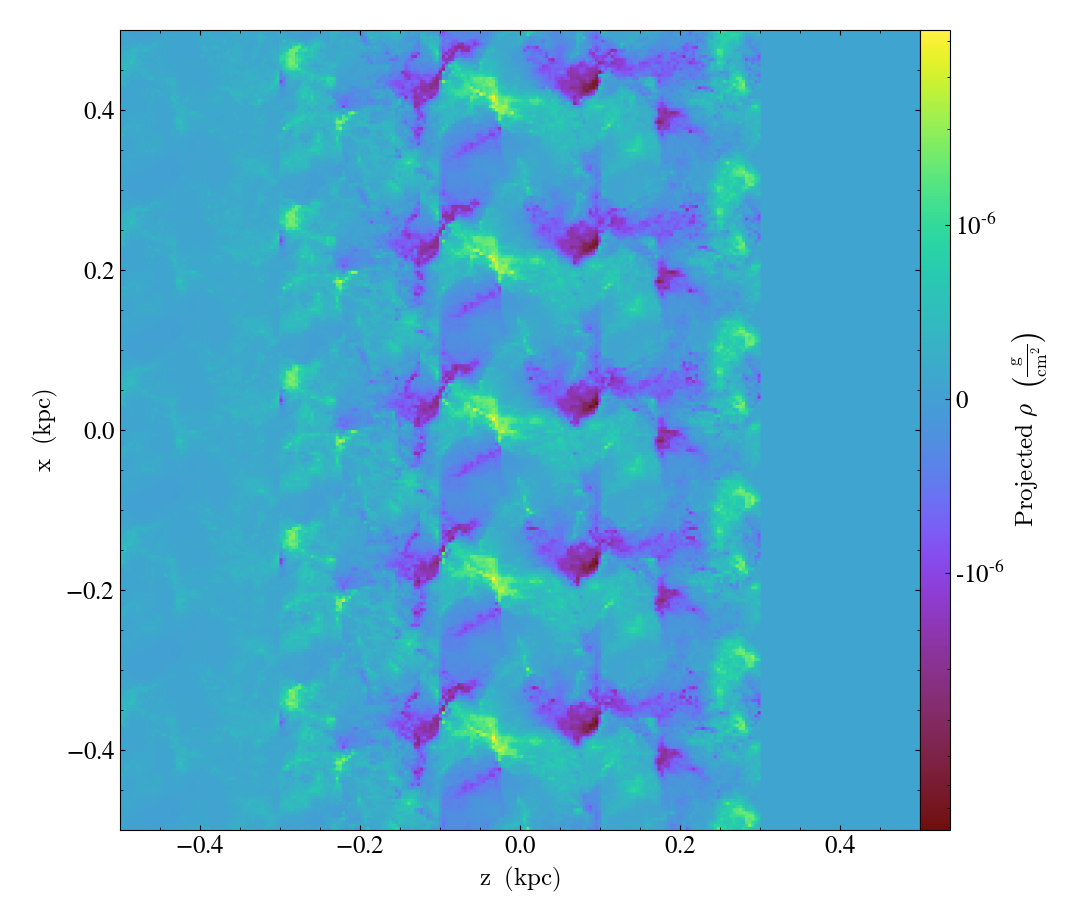

In [20]:
p = yt.ProjectionPlot(ds, 'y', 'density')
p.show()

yt : [INFO     ] 2018-06-27 10:39:23,514 xlim = 0.000000 1.000000
yt : [INFO     ] 2018-06-27 10:39:23,515 ylim = 0.000000 1.000000
yt : [INFO     ] 2018-06-27 10:39:23,516 xlim = 0.000000 1.000000
yt : [INFO     ] 2018-06-27 10:39:23,517 ylim = 0.000000 1.000000
yt : [INFO     ] 2018-06-27 10:39:23,518 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800
yt : [WARNING  ] 2018-06-27 10:39:23,755 Plot image for field ('gas', 'density') has both positive and negative values. Min = -0.000000, Max = 0.000000.
yt : [WARNING  ] 2018-06-27 10:39:23,756 Switching to symlog colorbar scaling unless linear scaling is specified later



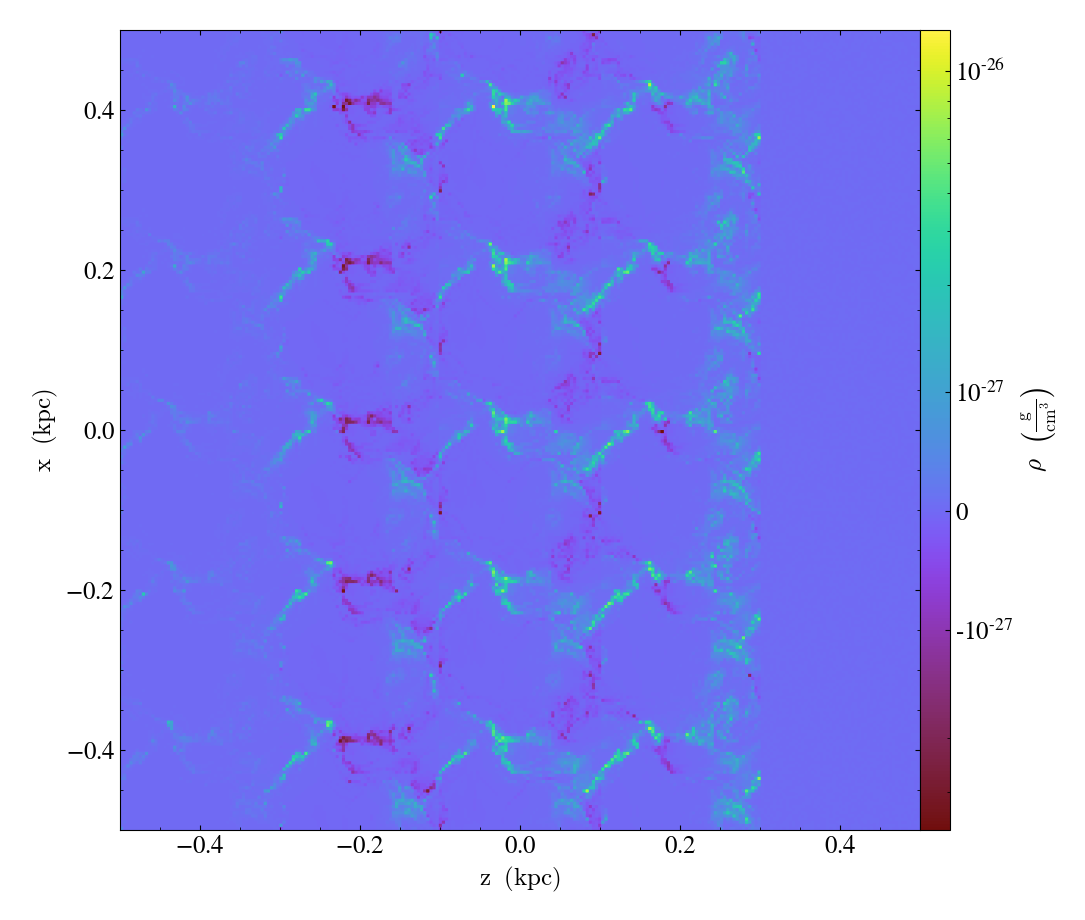

In [12]:
slc = yt.SlicePlot(ds, 'y', 'density')
slc.show()

yt : [WARNING  ] 2018-06-27 10:39:26,754 Overriding code units: Use this option only if you know that the dataset doesn't define the units correctly or at all.
yt : [INFO     ] 2018-06-27 10:39:26,755 Overriding length_unit: 1 kpc.
yt : [INFO     ] 2018-06-27 10:39:26,755 Overriding time_unit: 1 s.
yt : [INFO     ] 2018-06-27 10:39:26,756 Overriding mass_unit: 1.469e+36 g.
yt : [INFO     ] 2018-06-27 10:39:26,757 Overriding velocity_unit: 34300 s.
yt : [INFO     ] 2018-06-27 10:39:26,767 Parameters: current_time              = 1e-05
yt : [INFO     ] 2018-06-27 10:39:26,767 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2018-06-27 10:39:26,768 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2018-06-27 10:39:26,769 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2018-06-27 10:39:26,769 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2018-06-27 10:39:26,770 Parameters: current_redshift          = 99998.99999999999



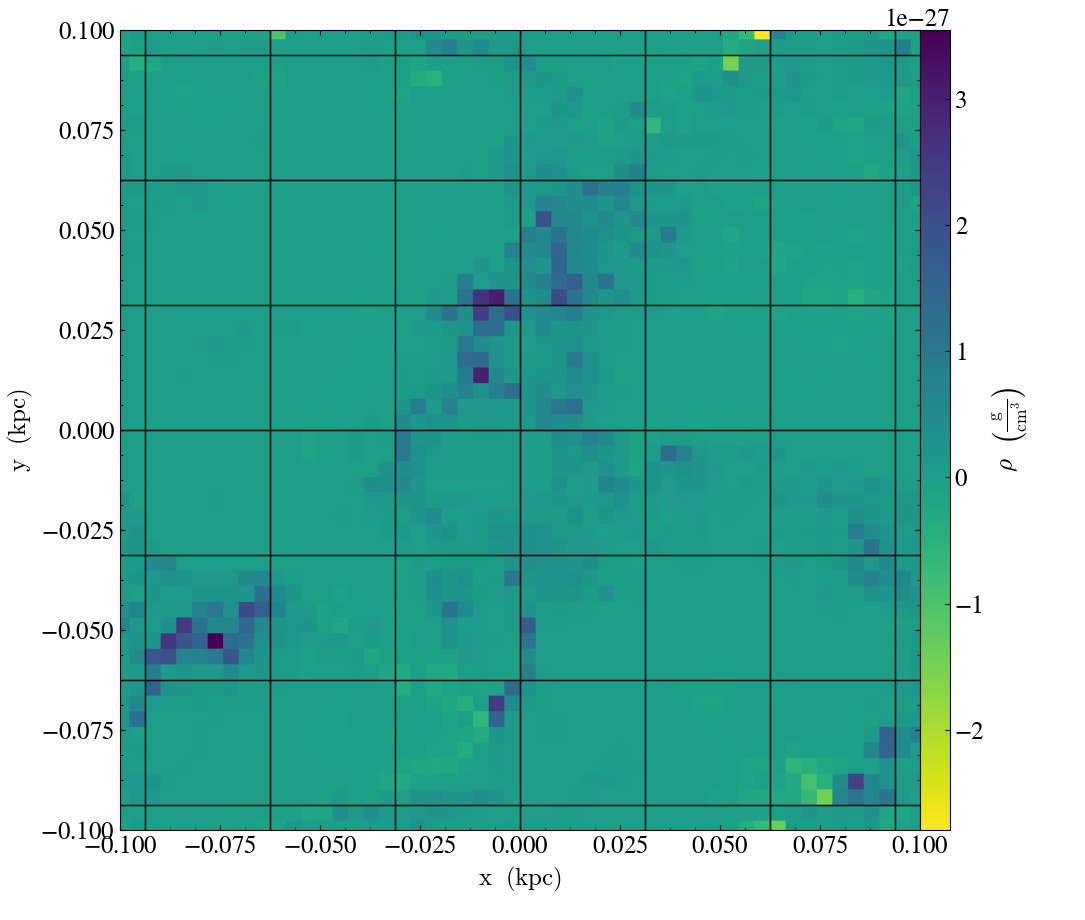

In [13]:
for ds in ts.piter():
    
    sz = yt.SlicePlot(ds,'z',field,center=center_mode)
#     sz.set_zlim(field,0.0,3)
    sz.set_log(field,False)
    sz.set_cmap(field,colormap)
    sz.set_unit(field,'g/cm**3')
    sz.set_axes_unit('kpc')
#     sz.annotate_timestamp(time_unit='code_time',corner='upper_right',
#                          time_format='t = {time:.4f} {units}')
    sz.annotate_grids(periodic=False)
    sz.zoom(5)
    sz.show()

yt : [INFO     ] 2018-06-27 10:39:41,193 Projection completed
yt : [INFO     ] 2018-06-27 10:39:41,194 xlim = 0.000000 1.000000
yt : [INFO     ] 2018-06-27 10:39:41,194 ylim = 0.000000 1.000000
yt : [INFO     ] 2018-06-27 10:39:41,195 xlim = 0.000000 1.000000
yt : [INFO     ] 2018-06-27 10:39:41,196 ylim = 0.000000 1.000000
yt : [INFO     ] 2018-06-27 10:39:41,198 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800
yt : [WARNING  ] 2018-06-27 10:39:41,221 Plot image for field ('gas', 'density') has both positive and negative values. Min = -0.000000, Max = 0.000000.
yt : [WARNING  ] 2018-06-27 10:39:41,221 Switching to symlog colorbar scaling unless linear scaling is specified later



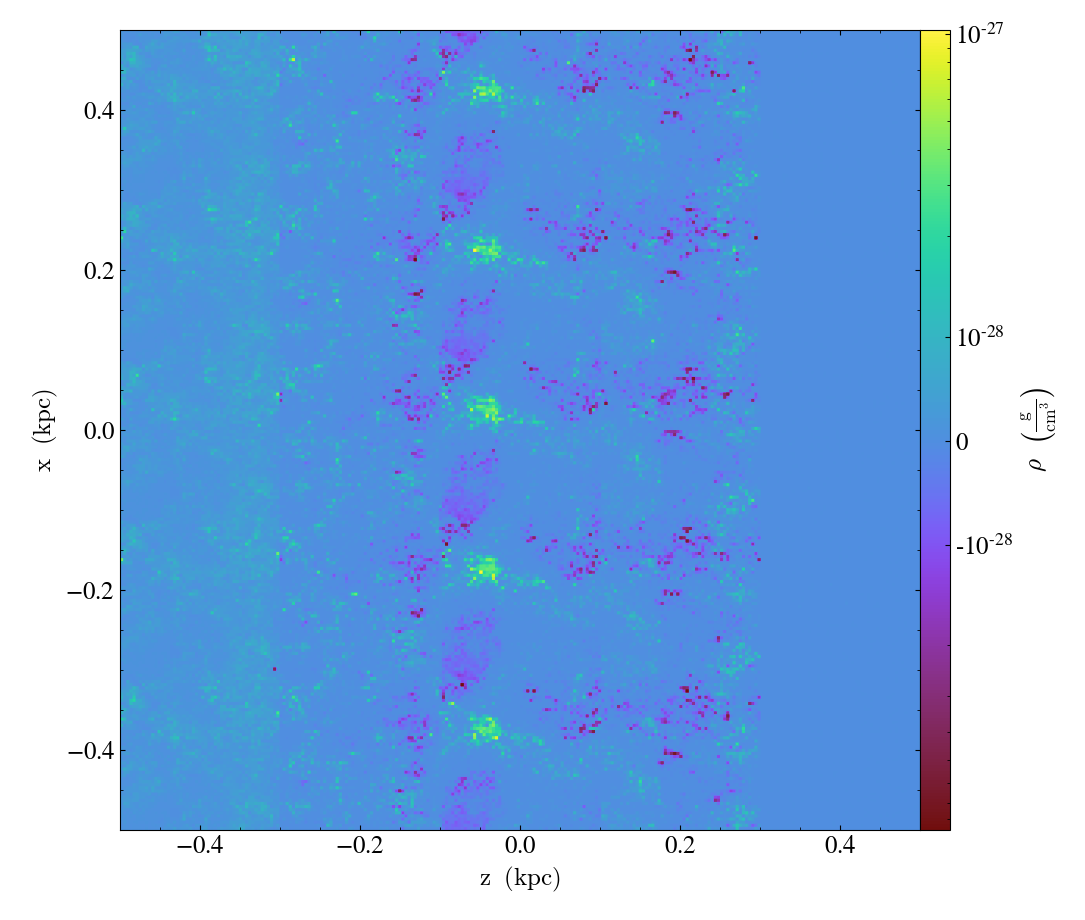

In [14]:
p = yt.ProjectionPlot(ds, "y", "density", weight_field="temperature")
# p.zoom(2.5)
p.show()
# p.save(name='sphericalcollapse_temp_weirdbox.png',mpl_kwargs={"dpi":dpi})

yt : [INFO     ] 2018-06-27 10:50:08,620 Setting default field to ('gas', 'density')
yt : [INFO     ] 2018-06-27 10:50:08,645 Rendering scene (Can take a while).
yt : [INFO     ] 2018-06-27 10:50:08,647 Creating volume
/usr/lib/python3.6/site-packages/yt-3.5.dev0-py3.6-linux-x86_64.egg/yt/units/yt_array.py:1351: RuntimeWarning: invalid value encountered in log10
  out_arr = func(np.asarray(inp), out=out, **kwargs)


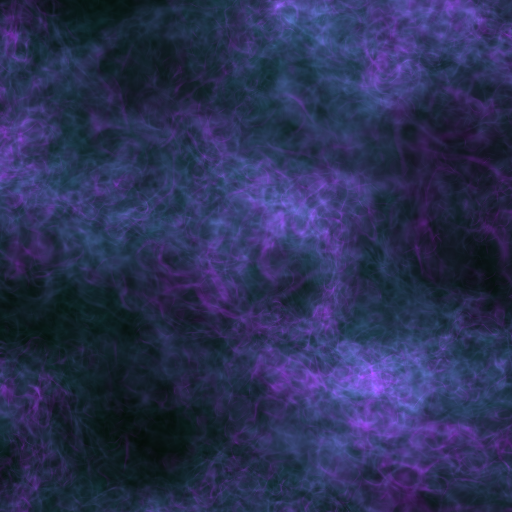

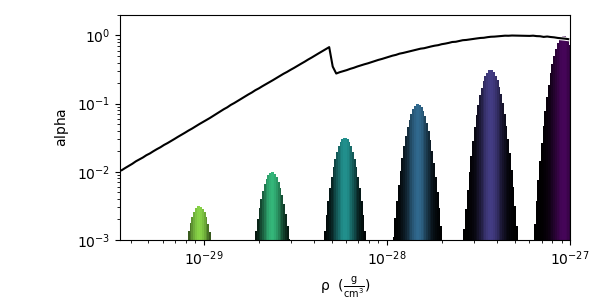

In [23]:
ds.periodicity = (True,True,True)

sc = yt.create_scene(ds, lens_type='perspective')

sc.camera.set_width(ds.quan(100,'kpc'))
source = sc[0]

# source.tfh.set_bounds((1e-31, 5e-26))
# source.tfh.set_log(True)
# source.tfh.grey_opacity = False

source.set_field('density')
source.set_log(True)
# source.set_use_ghost_zones(True)

bounds = (3.5e-30, 10e-28)

# Since this rendering is done in log space, the transfer function needs
# to be specified in log space.
tf = yt.ColorTransferFunction(np.log10(bounds))

tf.add_layers(7, colormap='viridis_r')

source.tfh.tf = tf
source.tfh.bounds = bounds

sc.camera.zoom(5)
sc.show(sigma_clip=6.0)
# sc.save(fname='sphericalcollapse_temp_symmgeom.png',sigma_clip=6.0)

source.tfh.plot(profile_field='density')

In [85]:
# sc = yt.create_scene(ds, lens_type='perspective')

# sc.camera.set_width(ds.quan(100,'kpc'))
# source = sc[0]

# # source.tfh.set_bounds((1e-31, 5e-26))
# # source.tfh.set_log(True)
# # source.tfh.grey_opacity = False

# source.set_field('temperature')
# source.set_log(True)
# source.set_use_ghost_zones(True)

# bounds = (2e1,6e2)

# # Since this rendering is done in log space, the transfer function needs
# # to be specified in log space.
# tf = yt.ColorTransferFunction(np.log10(bounds))

# tf.add_layers(7, colormap='viridis_r')

# source.tfh.tf = tf
# source.tfh.bounds = bounds

# sc.camera.zoom(7)
# sc.show(sigma_clip=6.0)
# # sc.save(fname='sphericalcollapse_temp_symmgeom.png',sigma_clip=6.0)

# source.tfh.plot(profile_field='temperature')

In [30]:
# ts = yt.load(['../blastwave/Data_%06d'%idx for idx in range(9,9+1,didx)])

In [31]:
# for ds in ts.piter():
    
#     sz = yt.SlicePlot(ds,'z',field,center=center_mode)
#     sz.set_zlim(field,0.0,3)
#     sz.set_log(field,False)
#     sz.set_cmap(field,colormap)
#     sz.set_unit(field,'code_mass/code_length**3')
#     sz.set_axes_unit('code_length')
#     sz.annotate_timestamp(time_unit='code_time',corner='upper_right',
#                          time_format='t = {time:.4f} {units}')
#     sz.annotate_grids(periodic=False)
#     sz.show()

In [32]:
# ds.periodicity = (True,True,True)

# sc = yt.create_scene(ds, lens_type='perspective')

# sc.camera.set_width(ds.quan(100,'kpc'))
# source = sc[0]

# # source.tfh.set_bounds((1e-3, 4))
# # source.tfh.set_log(True)
# # source.tfh.grey_opacity = False

# source.set_field('density')
# source.set_log(True)
# source.set_use_ghost_zones(True)

# bounds = (0.6, 4.5)

# tf = yt.ColorTransferFunction(np.log10(bounds))

# tf.add_layers(7, colormap='viridis_r')

# source.tfh.tf = tf
# source.tfh.bounds = bounds

# sc.camera.zoom(1)
# sc.show(sigma_clip=6.0)
# # sc.save(fname='sphericalcollapse_temp_symmgeom.png',sigma_clip=6.0)

# source.tfh.plot(profile_field='density')

In [33]:
# sc = yt.create_scene(ds, lens_type='perspective')

# sc.camera.set_width(ds.quan(100,'kpc'))
# source = sc[0]

# # source.tfh.set_bounds((1e-3, 4))
# # source.tfh.set_log(True)
# # source.tfh.grey_opacity = False

# source.set_field('temperature')
# source.set_log(True)
# source.set_use_ghost_zones(True)

# bounds = (10e-8, 5e-5)

# # Since this rendering is done in log space, the transfer function needs
# # to be specified in log space.
# tf = yt.ColorTransferFunction(np.log10(bounds))

# tf.add_layers(7, colormap='viridis_r')

# source.tfh.tf = tf
# source.tfh.bounds = bounds

# sc.camera.zoom(3)
# sc.show(sigma_clip=6.0)
# # sc.save(fname='sphericalcollapse_temp_symmgeom.png',sigma_clip=6.0)

# source.tfh.plot(profile_field='temperature')